In [89]:
import numpy as np

class LeontievModel:
    def __init__(self, X: np.array, y: np.array, y2: np.array):

        if X.shape[0] != y.shape[0] or y.shape[0] != y2.shape[0]:
            raise Exception("Введеные аргументы-матрицы имеют несопоставимую размерность.")

        self._X = X
        self._y = y
        self._x = X.sum(axis=1) + y
        self._y2 = y2

        self._A = None
        self._S = None
        self._d = None
        self._P = None
        self._lambda_A = None
        self._is_productive = None
        self._x2 = None
        self._xc = None

        self.fill()


    def __repr__(self):
        return f'''
Матрица прямых затрат A =
{self._A},
матрица A{' НЕ' if not self._is_productive else ''} продуктивна,
число Фробениуса λA = {self._lambda_A},
вектор Фробениуса pA = {self._frobenious_vector},
новый вектор объемов производства (валового продукта) x2 = , {self._x2}
вектор чистой продукции отраслей xc = {self._xc}
'''

    def fill(self):
        self._A = self.X / self.x
        self._S = np.linalg.inv(np.eye(self.X.shape[0]) - self._A)
        self._d, self._P = np.linalg.eig(self._A)

        frobenious_idx = self._d.argmax()

        self._lambda_A = self._d[frobenious_idx]
        self._frobenious_vector = self._P[:, frobenious_idx]
        self._is_productive = (self._S >= 0).all()
        self._x2 = self._S @ y2

        self._xc = np.zeros(self._A.shape)
        self._xc = self._x2 - (self._A * self._x2.T).sum(axis=0)

    def _get_X(self):
        return self._X

    def _get_x(self):
        return self._x

    def _get_y(self):
        return self._y

    def _get_y2(self):
        return self._y2

    def _get_A(self):
        return self._A

    def _get_S(self):
        return self._S

    def _get_d(self):
        return self._P

    def _get_lambda_A(self):
        return self._lambda_A

    def _get_frobenious_vector(self):
        return self._frobenious_vector

    def _get_is_productive(self):
        return self._is_productive

    def _get_x2(self):
        return self._x2

    def _get_xc(self):
        return self._xc

    X = property(fget=_get_X)
    x = property(fget=_get_x)
    y = property(fget=_get_y)
    y2 = property(fget=_get_y2)
    A = property(fget=_get_A)
    S = property(fget=_get_S)
    d = property(fget=_get_d)
    is_productive = property(fget=_get_is_productive)
    x2 = property(fget=_get_x2)
    xc = property(fget=_get_xc)
    lambdaA = property(fget=_get_lambda_A)
    frobenious_vector = property(fget=_get_frobenious_vector)





In [90]:
# Вариант 31 (вариант из методички для теста)
X = np.array([[11, 30],
              [17, 20]])

y = np.array([100, 130])
x = np.array([141, 167])
y2 = np.array([200, 130])


In [91]:
LeontievModel(X, y, y2)


Матрица прямых затрат A = 
[[0.07801418 0.17964072]
 [0.12056738 0.11976048]],
матрица A продуктивна,
число Фробениуса λA = 0.2475295138840824,
вектор Фробениуса pA = [-0.72730684 -0.68631243],
новый вектор объемов производства (валового продукта) x2 = , [252.43548387 182.26344086]
вектор чистой продукции отраслей xc = [202.30645161 127.69354839]

In [92]:
# Вариант 22 (мой вариант)
X = np.array([[12, 26],
              [22, 28]])
y = np.array([95, 131])

y2 = y.copy()
y2[0] *= 2
y2

array([190, 131])

In [93]:
m = LeontievModel(X, y, y2)

In [94]:
m


Матрица прямых затрат A = 
[[0.09022556 0.14364641]
 [0.16541353 0.15469613]],
матрица A продуктивна,
число Фробениуса λA = 0.27994155712113855,
вектор Фробениуса pA = [-0.60364987 -0.79724955],
новый вектор объемов производства (валового продукта) x2 = , [240.75068279 202.08522379]
вектор чистой продукции отраслей xc = [179.20539546 141.79460454]

Доступ к результатам вычисленных значений модели осуществляется через свойства объекта (модели). При попытке изменить значение, выведится ошибка. Это вполне логично - запретить изменение высчитанных значений.

In [95]:
m.A = None # произойдет ошибка, так как высчитанное значение изменить нельзя

AttributeError: can't set attribute

Можно было бы изменить входные значения X, y и y2, и пересчитать результаты, однако лучше для этого просто создать новый объект (модель). В этом случае также блокируем доступ к изменению первоначальных данных

In [96]:
m.X = np.array([12,12,2]) # произойдет ошибка - лучше создать новую модель и высчитать новые значения, чем менять существующую!

AttributeError: can't set attribute

In [97]:
LeontievModel(X=np.array([[1,2,3], [4,5,6]]),
              y=np.array([1]),
              y2=np.array([2,6])) # Проверка размерности матриц

Exception: Введеные аргументы-матрицы имеют несопоставимую размерность.

In [98]:
m.A # Матрица прямых затрат

array([[0.09022556, 0.14364641],
       [0.16541353, 0.15469613]])

In [99]:
m.is_productive # Продуктивна ли матрица

True

In [100]:
m.lambdaA # Число Фробениуса

0.27994155712113855

In [101]:
m.frobenious_vector # вектор Фробениуса pA

array([-0.60364987, -0.79724955])

In [102]:
m.x2 # новый вектор объемов производства (валового продукта) x2

array([240.75068279, 202.08522379])

In [103]:
m.xc # вектор чистой продукции отраслей xc

array([179.20539546, 141.79460454])

In [104]:
import matplotlib.pyplot as plt


Матрица прямых затрат A = 
[[0.09022556 0.14364641]
 [0.16541353 0.15469613]],
матрица A продуктивна,
число Фробениуса λA = 0.27994155712113855,
вектор Фробениуса pA = [-0.60364987 -0.79724955],
новый вектор объемов производства (валового продукта) x2 = , [240.75068279 202.08522379]
вектор чистой продукции отраслей xc = [179.20539546 141.79460454]



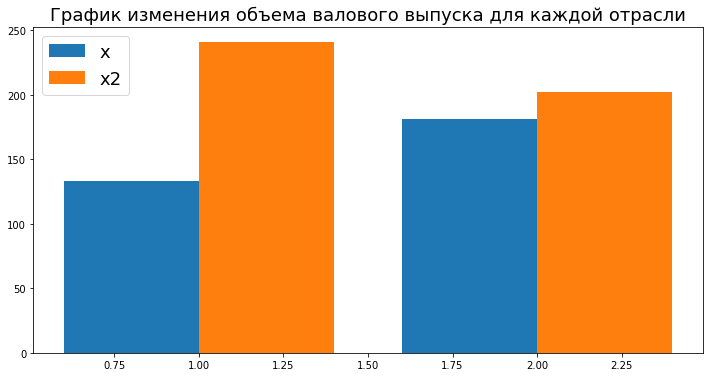

In [105]:
#  Задаем смещение равное половине ширины прямоугольника:
x1 = np.arange(1, m.x.shape[0] + 1) - 0.2
x2 = np.arange(1, m.x.shape[0] + 1) + 0.2
y1 = m.x
y2 = m.x2

fig, ax = plt.subplots()

ax.bar(x1, y1, width = 0.4)
ax.bar(x2, y2, width = 0.4)

plt.title("График изменения объема валового выпуска для каждой отрасли", size=18)
plt.legend(('x', 'x2'), fontsize=18, title_fontsize=18)
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

print(m)
plt.show()